In [1]:
#importar librerias 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("C:/Users/jabel/OneDrive - usach.cl/Inv/UValpo/aprendizaje de maquina/trabajo_aprendizaje maquina/train.tsv", delimiter = "\t", quoting = 3)

#dataset1 = pd.read_csv("C:/Users/jabel/OneDrive - usach.cl/Inv/UValpo/aprendizaje de maquina/trabajo_aprendizaje maquina/train.tsv", delimiter = "\t", quoting = 3)
#dataset2  = pd.read_csv("C:/Users/jabel/OneDrive - usach.cl/Inv/UValpo/aprendizaje de maquina/trabajo_aprendizaje maquina/dev.tsv", delimiter = "\t", quoting = 3)

In [3]:
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 5886):
    review = re.sub('[^a-zA-Z]', ' ', dataset['tweet'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('spanish'))]
    review = ' '.join(review)
    corpus.append(review)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 2].values

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

La matriz de confusión (confusion matrix ) presenta en una tabla una visión gráfica de los errores cometidos por el modelo de clasificación. Se trata de un modelo gráfico para visualizar el nivel de acierto de un modelo de predicción. Esta matriz indica el número de instancias correcta e incorrectamente clasificadas. Los parámetros que nos indica son: 
    
        * Verdadero positivo (True Positive, TP): número de clasificaciones correctas en la clase positiva (P).
        * Verdadero negativo (True Negative, TN): número de clasificaciones correctas en la clase negativa (N).
        * Falso negativo (False Negative, FN): número de clasificaciones incorrectas de clase positiva clasificada como negativa.
        * Falso positivo (False Positive, FP): número de clasificaciones incorrectas de clase negativa clasificada como positiva.


* La matriz de confusión se puede extender a más de dos clases de forma natural. Esta representación nos permite identificar de forma rápida el número de instancias correctamente clasificadas, que se corresponde con la diagonal de la tabla. en el caso de problemas de clasificación que impliquen más de dos clases, se puede realizar la evaluación de dos formas distintas: 
  
     * 1-vs-1: midiendo la capacidad de discriminar entre instancias de una clase, considerada la clase positiva, frente a las      instancias de otra clase, consideradas negativas.
     * 1-vs-all: midiendo la capacidad de discriminar entre instancias de una clase, considerada la clase positiva, frente a        las instancias de las demás clases, consideradas negativas.
  
 
* El error de clasificación (misclassification error, ERR) es la suma de la predicciones incorrectas sobre el número total de predicciones. 
  $$ ERR = \dfrac{FP+FN}{FP+FN+TP+TN}$$
  
* La exactitud (accuracy, ACC) es el número de predicciones correctas sobre el número total de predicciones.
  $$ ACC= 1- ERR$$
  
* Tasa de verdaderos positivos (True Positive Rate, TPR)
  $$ TPR = \dfrac{TP}{FN+TP}$$
  
* Tasa de verdaderos negativos (False Positive Rate, FPR)
  $$ FPR =  \dfrac{FP}{FP+TN}$$
      
* La precisión (precision, PRE) mide el rendimiento relacionado con las tasas de verdaderos positivos y negativos.
  $$ PRE = \dfrac{TP}{TP+FP}$$
  
* El recall (recall, REC) y la sensibilidad (sensitivity, SEN) se corresponden con la tasa de verdaderos positivos (TPR), mientras que la especificidad (specificity, SPE) se define como la tasa de instancias correctamente clasificadas como negativas respecto a todas las instancias negativas.
  $$ REC= SEN = TPR = \dfrac{TP}{FN+TP}$$
  $$ SPE = \dfrac{TN}{TN+PP}= 1- FPR$$
  
* F1 (F1 score) es una combianción de la la precisión y el recall.
  $$F1 = 2 \dfrac{(PRE)(REC)}{(PRE)(REC)} $$

### K- Nearest Neighbour (KNN). 
Es un algoritmo de aprendizaje supervisado de clasificación, de modo que a partir de un juego de datos de entrenamiento su objetivo será clasificar correctamente todas las instancias nuevas. El juego de datos típico de este tipo de algoritmos está formado por varios atributos descriptivos y un solo atributo objetivo, también llamado clase. En contraste con otros algoritmos de aprendizaje supervisado, el algoritmo kNN no genera un modelo fruto del aprendizaje con datos de entrenamiento, sino que el aprendizaje sucede en el mismo momento en el que se pide clasificar una nueva instancia. A este tipo de algoritmos se les llama métodos de aprendizaje perezoso o \textit{lazy learning methods}

confusion matrix:
 [[  9   1   0  10 103   4   0]
 [  2   1   0   1  20   0   0]
 [  0   1   1   0  12   0   0]
 [  4   0   1  33 217   0   0]
 [ 18   0   5  18 528   1   0]
 [  6   0   1   4 116   9   0]
 [  2   0   0   5  45   0   0]]
accuracy score =  0.4932088285229202
              precision    recall  f1-score   support

      anger        0.22      0.07      0.11       127
    disgust        0.33      0.04      0.07        24
       fear        0.12      0.07      0.09        14
        joy        0.46      0.13      0.20       255
     others        0.51      0.93      0.66       570
    sadness        0.64      0.07      0.12       136
   surprise        0.00      0.00      0.00        52

    accuracy                           0.49      1178
   macro avg       0.33      0.19      0.18      1178
weighted avg       0.45      0.49      0.39      1178



C:\Users\jabel\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jabel\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jabel\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


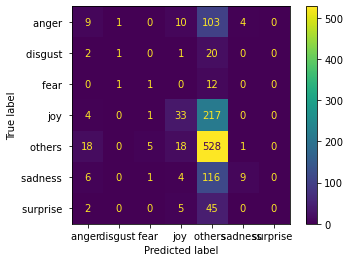

In [7]:
#KNN
#training model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p = 2)
knn.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
knna = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

#cheking metrics and plot matrix confussion
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
print(classification_report(y_test, y_pred))
plot_confusion_matrix(knn,x_test,y_test)

## Maquina de Soporte Vectoriales.
Las SVM son modelos de aprendizaje supervisado asociados a algoritmos de aprendizaje que inspeccionan datos utilizados para la clasificación y el análisis de regresión;  tanto lineales como no lineales. La hipótesis tradicional se basa en lo que se conoce como minimización del riesgo empírico (\textit{empirical risk minimization}) mientras que el enfoque de las SVM se basa en la minimización del riesgo estructural (\textit{structural risk minimization}), de modo que lo que se busca es construir modelos que estructuralmente tengan poco riesgo de cometer errores ante clasificaciones futuras \cite{mt5}.


C:\Users\jabel\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


confusion matrix:
 [[ 59   7   0  12  33  11   5]
 [ 12   4   0   1   5   0   2]
 [  1   1   3   1   4   1   3]
 [ 12   5   1 121  91   8  17]
 [ 54  13   8 117 327  22  29]
 [  9   2   2  10  22  88   3]
 [  4   0   2  14  17   2  13]]
accuracy score =  0.5220713073005093
              precision    recall  f1-score   support

      anger        0.39      0.46      0.42       127
    disgust        0.12      0.17      0.14        24
       fear        0.19      0.21      0.20        14
        joy        0.44      0.47      0.46       255
     others        0.66      0.57      0.61       570
    sadness        0.67      0.65      0.66       136
   surprise        0.18      0.25      0.21        52

    accuracy                           0.52      1178
   macro avg       0.38      0.40      0.39      1178
weighted avg       0.54      0.52      0.53      1178



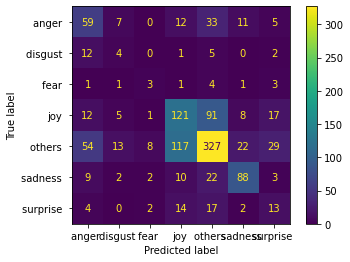

In [6]:
#SVM
#training model
from sklearn.svm import SVC
svc = SVC(kernel = 'linear',random_state = 0,  class_weight = 'balanced', decision_function_shape='ovr', max_iter = 1000)
svc.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
sva =accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

#cheking metrics and plot matrix confussion
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
print(classification_report(y_test, y_pred))
plot_confusion_matrix(svc,x_test,y_test)

confusion matrix:
 [[ 21   0   0   3  99   4   0]
 [  2   0   0   0  22   0   0]
 [  0   0   0   0  14   0   0]
 [  3   0   0  68 183   1   0]
 [  2   0   0  16 549   3   0]
 [  0   0   0   1  63  72   0]
 [  1   0   0   7  44   0   0]]
accuracy score =  0.6027164685908319
              precision    recall  f1-score   support

      anger        0.72      0.17      0.27       127
    disgust        0.00      0.00      0.00        24
       fear        0.00      0.00      0.00        14
        joy        0.72      0.27      0.39       255
     others        0.56      0.96      0.71       570
    sadness        0.90      0.53      0.67       136
   surprise        0.00      0.00      0.00        52

    accuracy                           0.60      1178
   macro avg       0.41      0.27      0.29      1178
weighted avg       0.61      0.60      0.53      1178



C:\Users\jabel\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jabel\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jabel\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


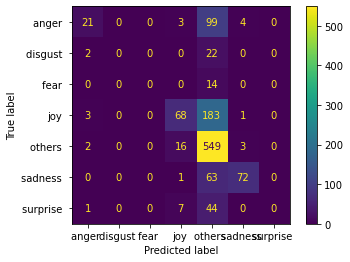

In [9]:
#Kernel SVM
#training model
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
sva2 = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

#cheking metrics and plot matrix confussion
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
print(classification_report(y_test, y_pred))
plot_confusion_matrix(svc,x_test,y_test)

## Naive Bayes.
Se basa en el concepto de probabilidad condicional y busca maximizar la verosimilitud del modelo, es decir, otorgar mayor importancia a aquellos eventos que son realmente relevantes en el juego de datos.En general, los métodos estadísticos suelen estimar un conjunto de parámetros probabilísticos, que expresan la probabilidad condicionada de cada clase dadas las propiedades de un ejemplo (descrito en forma de atributos).


confusion matrix:
 [[ 38   8   3  18  34  19   7]
 [  9   2   0   3   4   4   2]
 [  4   1   3   1   2   1   2]
 [ 25   7   3  93  49  43  35]
 [103  23  26 136 120 107  55]
 [ 14   1   0   7  24  83   7]
 [  5   2   5  13   6   8  13]]
accuracy score =  0.298811544991511
              precision    recall  f1-score   support

      anger        0.19      0.30      0.23       127
    disgust        0.05      0.08      0.06        24
       fear        0.07      0.21      0.11        14
        joy        0.34      0.36      0.35       255
     others        0.50      0.21      0.30       570
    sadness        0.31      0.61      0.41       136
   surprise        0.11      0.25      0.15        52

    accuracy                           0.30      1178
   macro avg       0.23      0.29      0.23      1178
weighted avg       0.38      0.30      0.30      1178



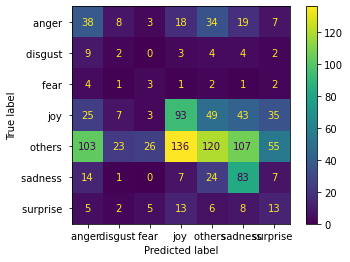

In [11]:
#Naive Bayes
#training model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = nb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
nba = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

#cheking metrics and plot matrix confussion
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
print(classification_report(y_test, y_pred))
plot_confusion_matrix(nb,x_test,y_test)

## Árbol de Decisión y Bosques Aleatorios. 
Como modelos supervisados que son, a los árboles de decisión que clasifican los datos del conjunto de entrada en función de una variable clasificadora categórica (es decir, que toma un conjunto finito de valores) se los llama árboles de clasificación. Si la variable clasificadora es continua, hablaríamos de árboles de regresión. Ambos tipos de árboles de decisión dan el nombre común CART (Classification and Regression Trees) según el trabajo original descrito por Breiman et al \cite{mt2}. Cuando los clasificadores base son árboles de decisión y se utiliza un muestreo tanto de los elementos del conjunto original de entrenamiento como de sus variables, el clasificador combinado se conoce como \textit{Random forest} \cite{mt3}, dado que se trata precisamente de un conjunto (o bosque) de árboles que han sido creados mediante un proceso aleatorio (por lo que respecta al conjunto de entrenamiento usado para cada uno de ellos). 

confusion matrix:
 [[ 31   4   1  17  57  12   5]
 [  7   4   0   2   7   3   1]
 [  1   0   3   0   5   0   5]
 [  8   2   0  96 127  11  11]
 [ 20   6   4  92 400  31  17]
 [ 11   1   0  10  52  62   0]
 [  2   2   1  19  23   1   4]]
accuracy score =  0.5093378607809848
              precision    recall  f1-score   support

      anger        0.39      0.24      0.30       127
    disgust        0.21      0.17      0.19        24
       fear        0.33      0.21      0.26        14
        joy        0.41      0.38      0.39       255
     others        0.60      0.70      0.64       570
    sadness        0.52      0.46      0.48       136
   surprise        0.09      0.08      0.08        52

    accuracy                           0.51      1178
   macro avg       0.36      0.32      0.34      1178
weighted avg       0.49      0.51      0.50      1178



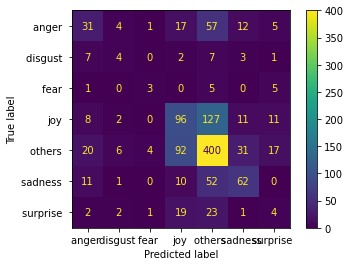

In [11]:
#Decision Tree
#training model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
dta = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

#cheking metrics and plot matrix confussion
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
print(classification_report(y_test, y_pred))
plot_confusion_matrix(dt,x_test,y_test)

confusion matrix:
 [[ 23   2   0   6  82  11   3]
 [  5   3   0   2  13   1   0]
 [  0   0   3   0  10   0   1]
 [  4   0   0  88 161   2   0]
 [  4   1   1  26 517  13   8]
 [  1   0   0   2  49  84   0]
 [  3   0   1   8  37   1   2]]
accuracy score =  0.6112054329371817
              precision    recall  f1-score   support

      anger        0.57      0.18      0.28       127
    disgust        0.50      0.12      0.20        24
       fear        0.60      0.21      0.32        14
        joy        0.67      0.35      0.45       255
     others        0.59      0.91      0.72       570
    sadness        0.75      0.62      0.68       136
   surprise        0.14      0.04      0.06        52

    accuracy                           0.61      1178
   macro avg       0.55      0.35      0.39      1178
weighted avg       0.60      0.61      0.56      1178



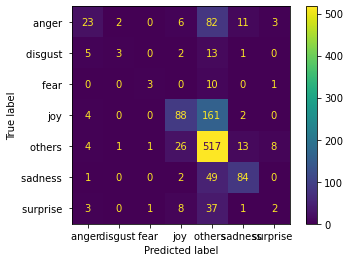

In [12]:
#Random Forest
#training model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 140, criterion = 'entropy',random_state = 0)
rf.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
rfa = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

#cheking metrics and plot matrix confussion
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
print(classification_report(y_test, y_pred))
plot_confusion_matrix(rf,x_test,y_test)


## CatBoost.
Es el acronimo de Category  and Boosting. Este algoritmo puede mejorar el rendimiento del modelo al tiempo que reduce el sobreajuste y el tiempo dedicado al ajuste. CatBoost tiene varios parámetros para ajustar. Aún así, reduce la necesidad de un ajuste extensivo de hiperparámetros porque los parámetros predeterminados producen un gran resultado. Además, es una implementación novedosa de alto rendimiento y codicia que impulsa el gradiente.

Learning rate set to 0.085632
0:	learn: 1.8416140	total: 173ms	remaining: 2m 52s
1:	learn: 1.7591002	total: 200ms	remaining: 1m 39s
2:	learn: 1.6948121	total: 226ms	remaining: 1m 15s
3:	learn: 1.6433492	total: 248ms	remaining: 1m 1s
4:	learn: 1.5999876	total: 272ms	remaining: 54.2s
5:	learn: 1.5639437	total: 294ms	remaining: 48.8s
6:	learn: 1.5318752	total: 316ms	remaining: 44.8s
7:	learn: 1.5018282	total: 338ms	remaining: 41.9s
8:	learn: 1.4741770	total: 362ms	remaining: 39.8s
9:	learn: 1.4495541	total: 383ms	remaining: 38s
10:	learn: 1.4294501	total: 407ms	remaining: 36.6s
11:	learn: 1.4134752	total: 435ms	remaining: 35.8s
12:	learn: 1.3981839	total: 459ms	remaining: 34.8s
13:	learn: 1.3829343	total: 481ms	remaining: 33.9s
14:	learn: 1.3675150	total: 502ms	remaining: 33s
15:	learn: 1.3559730	total: 525ms	remaining: 32.3s
16:	learn: 1.3464321	total: 554ms	remaining: 32s
17:	learn: 1.3334058	total: 580ms	remaining: 31.6s
18:	learn: 1.3234338	total: 605ms	remaining: 31.2s
19:	learn: 1.3

160:	learn: 1.0727204	total: 4.37s	remaining: 22.8s
161:	learn: 1.0716871	total: 4.39s	remaining: 22.7s
162:	learn: 1.0709477	total: 4.41s	remaining: 22.6s
163:	learn: 1.0703156	total: 4.43s	remaining: 22.6s
164:	learn: 1.0695459	total: 4.45s	remaining: 22.5s
165:	learn: 1.0690711	total: 4.47s	remaining: 22.5s
166:	learn: 1.0678196	total: 4.49s	remaining: 22.4s
167:	learn: 1.0666319	total: 4.51s	remaining: 22.3s
168:	learn: 1.0661195	total: 4.53s	remaining: 22.3s
169:	learn: 1.0653303	total: 4.55s	remaining: 22.2s
170:	learn: 1.0646503	total: 4.57s	remaining: 22.2s
171:	learn: 1.0639821	total: 4.59s	remaining: 22.1s
172:	learn: 1.0634084	total: 4.61s	remaining: 22s
173:	learn: 1.0625231	total: 4.63s	remaining: 22s
174:	learn: 1.0617399	total: 4.65s	remaining: 21.9s
175:	learn: 1.0609281	total: 4.67s	remaining: 21.9s
176:	learn: 1.0603615	total: 4.69s	remaining: 21.8s
177:	learn: 1.0598240	total: 4.71s	remaining: 21.8s
178:	learn: 1.0591601	total: 4.74s	remaining: 21.7s
179:	learn: 1.05

327:	learn: 0.9856165	total: 8.13s	remaining: 16.7s
328:	learn: 0.9851034	total: 8.16s	remaining: 16.6s
329:	learn: 0.9848004	total: 8.18s	remaining: 16.6s
330:	learn: 0.9845022	total: 8.21s	remaining: 16.6s
331:	learn: 0.9842536	total: 8.23s	remaining: 16.6s
332:	learn: 0.9838841	total: 8.25s	remaining: 16.5s
333:	learn: 0.9836543	total: 8.27s	remaining: 16.5s
334:	learn: 0.9834125	total: 8.3s	remaining: 16.5s
335:	learn: 0.9831116	total: 8.32s	remaining: 16.4s
336:	learn: 0.9823862	total: 8.34s	remaining: 16.4s
337:	learn: 0.9820862	total: 8.36s	remaining: 16.4s
338:	learn: 0.9817640	total: 8.38s	remaining: 16.3s
339:	learn: 0.9813659	total: 8.4s	remaining: 16.3s
340:	learn: 0.9811366	total: 8.42s	remaining: 16.3s
341:	learn: 0.9806632	total: 8.45s	remaining: 16.2s
342:	learn: 0.9801268	total: 8.47s	remaining: 16.2s
343:	learn: 0.9797956	total: 8.49s	remaining: 16.2s
344:	learn: 0.9795316	total: 8.51s	remaining: 16.2s
345:	learn: 0.9790765	total: 8.53s	remaining: 16.1s
346:	learn: 0.

488:	learn: 0.9330587	total: 11.7s	remaining: 12.2s
489:	learn: 0.9328125	total: 11.7s	remaining: 12.2s
490:	learn: 0.9324843	total: 11.7s	remaining: 12.2s
491:	learn: 0.9323194	total: 11.8s	remaining: 12.1s
492:	learn: 0.9320305	total: 11.8s	remaining: 12.1s
493:	learn: 0.9316925	total: 11.8s	remaining: 12.1s
494:	learn: 0.9312431	total: 11.8s	remaining: 12.1s
495:	learn: 0.9311077	total: 11.8s	remaining: 12s
496:	learn: 0.9308265	total: 11.9s	remaining: 12s
497:	learn: 0.9306159	total: 11.9s	remaining: 12s
498:	learn: 0.9303941	total: 11.9s	remaining: 12s
499:	learn: 0.9302361	total: 11.9s	remaining: 11.9s
500:	learn: 0.9300395	total: 12s	remaining: 11.9s
501:	learn: 0.9297907	total: 12s	remaining: 11.9s
502:	learn: 0.9292787	total: 12s	remaining: 11.9s
503:	learn: 0.9290564	total: 12s	remaining: 11.8s
504:	learn: 0.9287123	total: 12s	remaining: 11.8s
505:	learn: 0.9283232	total: 12.1s	remaining: 11.8s
506:	learn: 0.9278807	total: 12.1s	remaining: 11.8s
507:	learn: 0.9275096	total: 1

651:	learn: 0.8931407	total: 15.2s	remaining: 8.09s
652:	learn: 0.8929504	total: 15.2s	remaining: 8.07s
653:	learn: 0.8927449	total: 15.2s	remaining: 8.04s
654:	learn: 0.8926307	total: 15.2s	remaining: 8.02s
655:	learn: 0.8922137	total: 15.3s	remaining: 8s
656:	learn: 0.8918407	total: 15.3s	remaining: 7.98s
657:	learn: 0.8914684	total: 15.3s	remaining: 7.96s
658:	learn: 0.8911421	total: 15.3s	remaining: 7.93s
659:	learn: 0.8909914	total: 15.4s	remaining: 7.91s
660:	learn: 0.8908645	total: 15.4s	remaining: 7.89s
661:	learn: 0.8907608	total: 15.4s	remaining: 7.87s
662:	learn: 0.8906599	total: 15.4s	remaining: 7.85s
663:	learn: 0.8904601	total: 15.5s	remaining: 7.82s
664:	learn: 0.8903037	total: 15.5s	remaining: 7.8s
665:	learn: 0.8898662	total: 15.5s	remaining: 7.78s
666:	learn: 0.8896227	total: 15.5s	remaining: 7.76s
667:	learn: 0.8894832	total: 15.6s	remaining: 7.73s
668:	learn: 0.8892017	total: 15.6s	remaining: 7.71s
669:	learn: 0.8888025	total: 15.6s	remaining: 7.69s
670:	learn: 0.88

816:	learn: 0.8582319	total: 19.1s	remaining: 4.27s
817:	learn: 0.8580545	total: 19.1s	remaining: 4.25s
818:	learn: 0.8579261	total: 19.1s	remaining: 4.22s
819:	learn: 0.8576346	total: 19.1s	remaining: 4.2s
820:	learn: 0.8575122	total: 19.2s	remaining: 4.18s
821:	learn: 0.8573658	total: 19.2s	remaining: 4.15s
822:	learn: 0.8572540	total: 19.2s	remaining: 4.13s
823:	learn: 0.8569409	total: 19.2s	remaining: 4.11s
824:	learn: 0.8566792	total: 19.2s	remaining: 4.08s
825:	learn: 0.8564978	total: 19.3s	remaining: 4.06s
826:	learn: 0.8562763	total: 19.3s	remaining: 4.04s
827:	learn: 0.8560856	total: 19.3s	remaining: 4.01s
828:	learn: 0.8558119	total: 19.3s	remaining: 3.99s
829:	learn: 0.8556240	total: 19.4s	remaining: 3.96s
830:	learn: 0.8555293	total: 19.4s	remaining: 3.94s
831:	learn: 0.8554134	total: 19.4s	remaining: 3.92s
832:	learn: 0.8552534	total: 19.4s	remaining: 3.89s
833:	learn: 0.8551265	total: 19.4s	remaining: 3.87s
834:	learn: 0.8549774	total: 19.5s	remaining: 3.85s
835:	learn: 0

979:	learn: 0.8279538	total: 22.7s	remaining: 463ms
980:	learn: 0.8278237	total: 22.7s	remaining: 440ms
981:	learn: 0.8277115	total: 22.7s	remaining: 417ms
982:	learn: 0.8275455	total: 22.8s	remaining: 394ms
983:	learn: 0.8274036	total: 22.8s	remaining: 371ms
984:	learn: 0.8272325	total: 22.8s	remaining: 347ms
985:	learn: 0.8270935	total: 22.8s	remaining: 324ms
986:	learn: 0.8266488	total: 22.8s	remaining: 301ms
987:	learn: 0.8265203	total: 22.9s	remaining: 278ms
988:	learn: 0.8263941	total: 22.9s	remaining: 255ms
989:	learn: 0.8261462	total: 22.9s	remaining: 231ms
990:	learn: 0.8260152	total: 22.9s	remaining: 208ms
991:	learn: 0.8255935	total: 22.9s	remaining: 185ms
992:	learn: 0.8254014	total: 23s	remaining: 162ms
993:	learn: 0.8251952	total: 23s	remaining: 139ms
994:	learn: 0.8250403	total: 23s	remaining: 116ms
995:	learn: 0.8249514	total: 23s	remaining: 92.5ms
996:	learn: 0.8248548	total: 23s	remaining: 69.3ms
997:	learn: 0.8246792	total: 23.1s	remaining: 46.2ms
998:	learn: 0.82458

C:\Users\jabel\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jabel\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jabel\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


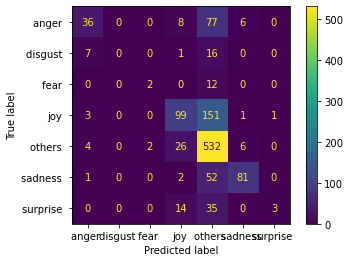

In [13]:
#Cat Boost
#training model
from catboost import CatBoostClassifier
cb = CatBoostClassifier()
cb.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = cb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
cba = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

#cheking metrics and plot matrix confussion
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
print(classification_report(y_test, y_pred))
plot_confusion_matrix(cb,x_test,y_test)

## Regresión Logística.
    Es un algoritmo de aprendizaje supervisado que se utiliza para la clasificación. El modelo creado por este algoritmo se basa en la función logística. Una función logística, también denominada curva logística, es una curva sigmoidea, donde $x_0$ es el valor  del punto medio de $x$ de la sigmoide, $M$ es el valor máximo de la curva y $s$ es la es la inclinación de la curva.
    $$ f(x) =  \dfrac{M}{1 + e^{-k(x-x_0)}}$$
    Esta función logística convierte la salida de una regresión lineal en clases. Una mayor linealidad entre la característica y la variable objetivo contribuye a un mejor rendimiento del modelo de regresión logística.

confusion matrix:
 [[ 58   7   2  10  32  11   7]
 [  9   7   0   1   2   2   3]
 [  1   1   5   0   3   0   4]
 [ 13   8   2 131  71   8  22]
 [ 47  16   8  93 333  23  50]
 [  6   3   2   4  21  92   8]
 [  4   0   4  12  12   2  18]]
accuracy score =  0.5466893039049237
              precision    recall  f1-score   support

      anger        0.42      0.46      0.44       127
    disgust        0.17      0.29      0.21        24
       fear        0.22      0.36      0.27        14
        joy        0.52      0.51      0.52       255
     others        0.70      0.58      0.64       570
    sadness        0.67      0.68      0.67       136
   surprise        0.16      0.35      0.22        52

    accuracy                           0.55      1178
   macro avg       0.41      0.46      0.42      1178
weighted avg       0.59      0.55      0.56      1178



C:\Users\jabel\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


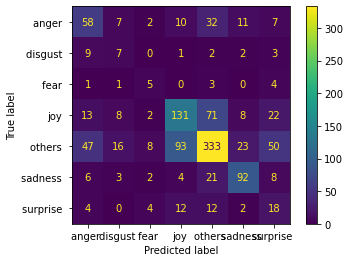

In [9]:
#Logistic Regression
#training model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0, class_weight='balanced')
lr.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
lra = accuracy_score(y_test,y_pred)
print('accuracy score = ',lra)

#cheking metrics and plot matrix confussion
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
print(classification_report(y_test, y_pred))
plot_confusion_matrix(lr,x_test,y_test)

##  MLPercertron. 
El percertrón es la red neuronal más simple usada para la clasificación de un tipo especial de patrones, los linealmente separables (es decir, patrones que se encuentran a ambos lados de un hiperplano). Consiste de una neurona con pesos sinápticos y umbral ajustables. El algoritmo usado para ajustar los parámetros libres de esta red neuronal apareció por primera vez en un procedimiento de aprendizaje desarrollado por Rosenblatt \cite{mt7} para su modelo de perceptrón del cerebro. Rosenblatt demostró que si los patrones usados para entrenar el perceptrón son sacados de dos clases linealmente separables, entonces el algoritmo del perceptrón converge y toma como superficie de decisión un hiperplano. 

The accuracy of the MLP is 0.5373514431239389
              precision    recall  f1-score   support

      anger        0.55      0.38      0.45       127
    disgust        0.25      0.04      0.07        24
       fear        0.50      0.07      0.12        14
        joy        0.53      0.40      0.45       255
     others        0.62      0.84      0.72       570
    sadness        0.79      0.67      0.73       136
   surprise        0.60      0.12      0.19        52

    accuracy                           0.62      1178
   macro avg       0.55      0.36      0.39      1178
weighted avg       0.61      0.62      0.59      1178



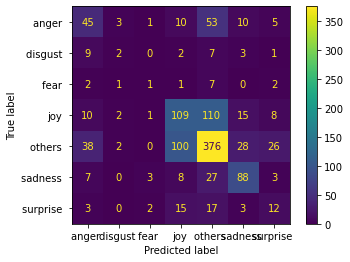

In [15]:
#MLPercentron
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=300)
mlp.fit(x_train, y_train)
score_mlp = mlp.score(x_test,y_test)
print('The accuracy of the MLP is', score_mlp)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(mlp,x_test,y_test)

Text(0.5, 1.0, 'Plotting the Model Accuracies')

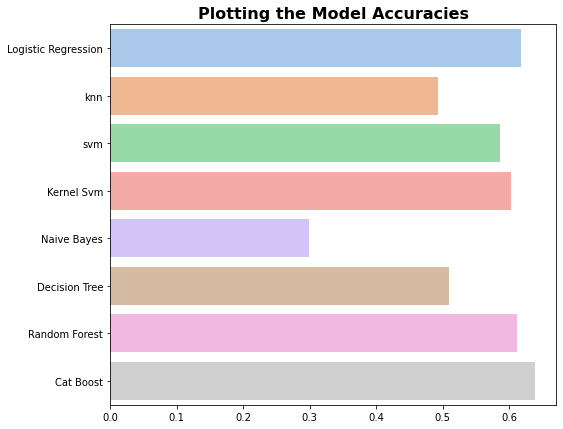

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (8,7))

ac = [lra,knna,sva,sva2,nba,dta,rfa,cba]
name = ['Logistic Regression','knn','svm','Kernel Svm','Naive Bayes','Decision Tree', 'Random Forest','Cat Boost']
sns.barplot(x = ac,y = name,palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")